In [12]:
pip install dash

  Obtaining dependency information for dash from https://files.pythonhosted.org/packages/b2/10/388c4a697275417a6974033e6ea7235d61e648e6c39d9cc06fcc6a6f71d4/dash-2.15.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-html-components==2.0.0 from https://files.pythonhosted.org/packages/75/65/1b16b853844ef59b2742a7de74a598f376ac0ab581f0dcc34db294e5c90e/dash_html_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-core-components==2.0.0 from https://files.pythonhosted.org/packages/00/9e/a29f726e84e531a36d56cff187e61d8c96d2cc253c5bcef9a7695acb7e6a/dash_core_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-table==5.0.0 from https://files.pythonhosted.org/packages/da/ce/43f77dc8e7bbad02a9f88d07bf794eaf68359df756a28bb9f2f78e255bb1/dash_table-5.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for retrying from https://files.pythonhosted.org/packages/8f/04/9e36f28be4c0532c0e9207ff9dc01fb

In [1]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Okt
import nltk
import koreanize_matplotlib

okt = Okt()
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
df = pd.read_csv('csv/test.csv')

In [52]:
df

,c_date,keyword,ID,p_date,user,contents
0,2024-02-29,Java 취업,789248659683254,2024-02-27,yj_0518517887,🔥취업률 높은 취업유망직종!\n\n전액무료에 매월 교육수당까지 받을 수 있다고?🔥\...
1,2024-02-29,Java 취업,405056675541148,2024-02-25,멀티잇 - Multicampus It,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업..."
2,2024-02-29,Java 취업,367413382763530,2024-02-25,멀티잇 - Multicampus It,🙎‍♂️백엔드 배우면 어디 취업 가능해요?\n🙋‍♀️정답! 개발이 필요한 모든 분야...
3,2024-02-29,Java 취업,763497902047623,2024-02-25,멀티잇 - Multicampus It,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업..."
4,2024-02-29,Java 취업,1176516517088600,2024-02-22,캠펑 - 대학생 필수 정보,2024년 취업가능! 항공 데이터 전문가 양성과정\n💻7기 선착순 모집중\n\n_2...
...,...,...,...,...,...,...
733,2024-02-29,빅데이터,799711781775527,2023-06-29,국제컴퓨터아카데미,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자😍\n교육비 최대 100% 국...
734,2024-02-29,빅데이터,730607098663031,2023-03-15,컴포트랩 Comfort Lab,"스포츠브라 입고, 벗기 어렵다는 편견은 no!\n앞지퍼형 브라로 입고 벗기 1초👍\..."
735,2024-02-29,빅데이터,757722275922119,2023-01-25,랜드북 - Landbook,랜드북에서 토지 적정가격 확인하고 수익성까지 분석하세요📈\n\n✅부동산을 소유하고 ...
736,2024-02-29,빅데이터,696057065325275,2023-01-25,랜드북 - Landbook,✅부동산을 소유하고 있는데 가치를 잘 모른다면?\n✅수익성 높은 부동산 매물을 찾고...


In [53]:
import re

def remove_special_characters(text):
    # 이모티콘 및 특수문자 제거를 위한 정규표현식
    pattern = r'[^a-zA-Z0-9가-힣\s]'  # 영문, 한글, 숫자, 공백만 허용

    # 정규표현식을 사용하여 특수문자 제거
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

# '내용' 열의 각 행에 대해 이모티콘과 특수문자 제거
df['contents_sentense'] = df['contents'].dropna().apply(remove_special_characters)

In [57]:
df[['contents','contents_sentense']]

,contents,contents_sentense
0,🔥취업률 높은 취업유망직종!\n\n전액무료에 매월 교육수당까지 받을 수 있다고?🔥\...,취업률 높은 취업유망직종\n\n전액무료에 매월 교육수당까지 받을 수 있다고\n\n전...
1,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업...",멀티잇은 채용을 목적으로 교육을 진행합니다\n우수 벤처스타트업 기업 연계로 취업 기...
2,🙎‍♂️백엔드 배우면 어디 취업 가능해요?\n🙋‍♀️정답! 개발이 필요한 모든 분야...,백엔드 배우면 어디 취업 가능해요\n정답 개발이 필요한 모든 분야\n\n삼성 청년 ...
3,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업...",멀티잇은 채용을 목적으로 교육을 진행합니다\n우수 벤처스타트업 기업 연계로 취업 기...
4,2024년 취업가능! 항공 데이터 전문가 양성과정\n💻7기 선착순 모집중\n\n_2...,2024년 취업가능 항공 데이터 전문가 양성과정\n7기 선착순 모집중\n\n24년 ...
...,...,...
733,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자😍\n교육비 최대 100% 국...,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자\n교육비 최대 100 국비지...
734,"스포츠브라 입고, 벗기 어렵다는 편견은 no!\n앞지퍼형 브라로 입고 벗기 1초👍\...",스포츠브라 입고 벗기 어렵다는 편견은 no\n앞지퍼형 브라로 입고 벗기 1초\n\n...
735,랜드북에서 토지 적정가격 확인하고 수익성까지 분석하세요📈\n\n✅부동산을 소유하고 ...,랜드북에서 토지 적정가격 확인하고 수익성까지 분석하세요\n\n부동산을 소유하고 있는...
736,✅부동산을 소유하고 있는데 가치를 잘 모른다면?\n✅수익성 높은 부동산 매물을 찾고...,부동산을 소유하고 있는데 가치를 잘 모른다면\n수익성 높은 부동산 매물을 찾고 있다...


## 단어 빈도수

In [85]:
def extract_nouns(text):
    if text is not None and isinstance(text, str):
        nouns = okt.nouns(text)
        return nouns
    else:
        return []

def calculate_filtered_count(content_nouns):
    # content_nouns에서 길이가 2 이상인 명사들만 필터링
    filtered_nouns = [noun for noun in content_nouns if len(noun) >= 2]
    
    # 단어 빈도수 계산
    filtered_count = Counter(filtered_nouns)
    
    return filtered_count    


# '내용'열에서 명사 추출
content_nouns = [okt.nouns(str(text)) if pd.notnull(text) else [] for text in df['contents_sentense']]
content_nouns = [noun for sublist in content_nouns for noun in sublist]

# 단어 빈도수 계산
content_count = Counter(content_nouns)


# filtered_count 계산
filtered_count = calculate_filtered_count(content_nouns)
# 가장 빈도가 높은 상위 15개 명사 추출 

top_content_nouns = filtered_count.most_common(15)

# 가장 빈도가 높은 상위 50개 명사 추출 
top_filtered_nouns = filtered_count.most_common(50)

df['nouns'] = df['contents'].apply(extract_nouns)

In [86]:
top_filtered_nouns

[('취업', 1773),
 ('개발자', 629),
 ('교육', 565),
 ('스쿨', 526),
 ('지원', 517),
 ('데이터', 502),
 ('분석', 444),
 ('백엔드', 415),
 ('무료', 335),
 ('준비', 304),
 ('부트캠프', 295),
 ('프로젝트', 290),
 ('투자', 280),
 ('국비', 266),
 ('포트폴리오', 254),
 ('빅데이터', 251),
 ('지금', 249),
 ('개발', 244),
 ('시작', 227),
 ('모집', 224),
 ('수강', 219),
 ('현직', 219),
 ('강의', 212),
 ('주식', 206),
 ('실무', 190),
 ('제공', 182),
 ('주도', 182),
 ('기초', 177),
 ('과정', 173),
 ('커리큘럼', 173),
 ('확인', 163),
 ('시장', 162),
 ('신청', 159),
 ('전액', 152),
 ('마감', 148),
 ('훈련', 146),
 ('개월', 145),
 ('마케팅', 139),
 ('가능', 138),
 ('기업', 136),
 ('전문가', 134),
 ('제로', 133),
 ('베이스', 131),
 ('여러분', 127),
 ('최대', 125),
 ('전공자', 125),
 ('코딩', 125),
 ('심화', 125),
 ('서비스', 124),
 ('테스트', 123)]

In [61]:
df

,c_date,keyword,ID,p_date,user,contents,contents_sentense,nouns
0,2024-02-29,Java 취업,789248659683254,2024-02-27,yj_0518517887,🔥취업률 높은 취업유망직종!\n\n전액무료에 매월 교육수당까지 받을 수 있다고?🔥\...,취업률 높은 취업유망직종\n\n전액무료에 매월 교육수당까지 받을 수 있다고\n\n전...,"[취업률, 취업, 유망, 직종, 전액, 무료, 매월, 교육, 수당, 수, 전액, 국..."
1,2024-02-29,Java 취업,405056675541148,2024-02-25,멀티잇 - Multicampus It,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업...",멀티잇은 채용을 목적으로 교육을 진행합니다\n우수 벤처스타트업 기업 연계로 취업 기...,"[멀티, 채용, 목적, 교육, 진행, 우수, 처, 스타트업, 기업, 계로, 취업, ..."
2,2024-02-29,Java 취업,367413382763530,2024-02-25,멀티잇 - Multicampus It,🙎‍♂️백엔드 배우면 어디 취업 가능해요?\n🙋‍♀️정답! 개발이 필요한 모든 분야...,백엔드 배우면 어디 취업 가능해요\n정답 개발이 필요한 모든 분야\n\n삼성 청년 ...,"[백엔드, 어디, 취업, 정답, 개발, 모든, 분야, 삼성, 청년, 아카데미, 위탁..."
3,2024-02-29,Java 취업,763497902047623,2024-02-25,멀티잇 - Multicampus It,"멀티잇은 채용을 목적으로 교육을 진행합니다.\n우수 벤처,스타트업 기업 연계로 취업...",멀티잇은 채용을 목적으로 교육을 진행합니다\n우수 벤처스타트업 기업 연계로 취업 기...,"[멀티, 채용, 목적, 교육, 진행, 우수, 처, 스타트업, 기업, 계로, 취업, ..."
4,2024-02-29,Java 취업,1176516517088600,2024-02-22,캠펑 - 대학생 필수 정보,2024년 취업가능! 항공 데이터 전문가 양성과정\n💻7기 선착순 모집중\n\n_2...,2024년 취업가능 항공 데이터 전문가 양성과정\n7기 선착순 모집중\n\n24년 ...,"[취업, 가능, 항공, 데이터, 전문가, 양성, 과정, 기, 선착순, 집중, 교육,..."
...,...,...,...,...,...,...,...,...
733,2024-02-29,빅데이터,799711781775527,2023-06-29,국제컴퓨터아카데미,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자😍\n교육비 최대 100% 국...,취업 고민하고 있는 사람들 모두 국비지원 받고 수업받자\n교육비 최대 100 국비지...,"[취업, 고민, 사람, 모두, 국비, 지원, 수업, 교육비, 최대, 국비, 지원, ..."
734,2024-02-29,빅데이터,730607098663031,2023-03-15,컴포트랩 Comfort Lab,"스포츠브라 입고, 벗기 어렵다는 편견은 no!\n앞지퍼형 브라로 입고 벗기 1초👍\...",스포츠브라 입고 벗기 어렵다는 편견은 no\n앞지퍼형 브라로 입고 벗기 1초\n\n...,"[스포츠, 브라, 편견, 앞, 지퍼, 브라, 지지, 강도, 운동, 해도, 움직임, ..."
735,2024-02-29,빅데이터,757722275922119,2023-01-25,랜드북 - Landbook,랜드북에서 토지 적정가격 확인하고 수익성까지 분석하세요📈\n\n✅부동산을 소유하고 ...,랜드북에서 토지 적정가격 확인하고 수익성까지 분석하세요\n\n부동산을 소유하고 있는...,"[랜드, 북, 토지, 적정가격, 확인, 수익, 분석, 부동산, 소유, 가치, 수익,..."
736,2024-02-29,빅데이터,696057065325275,2023-01-25,랜드북 - Landbook,✅부동산을 소유하고 있는데 가치를 잘 모른다면?\n✅수익성 높은 부동산 매물을 찾고...,부동산을 소유하고 있는데 가치를 잘 모른다면\n수익성 높은 부동산 매물을 찾고 있다...,"[부동산, 소유, 가치, 수익, 부동산, 매물, 랜드, 북, 토지, 분석, 매물, ..."


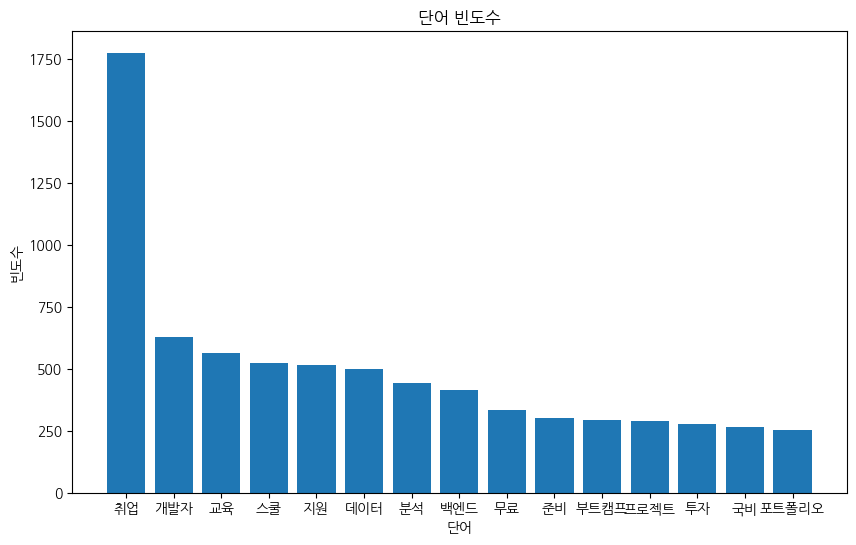

In [88]:
words, frequencies = zip(*top_content_nouns)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(range(len(words)), frequencies, tick_label=words)
plt.title('단어 빈도수')
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.show()


# 대쉬 시각화

In [91]:
# import plotly.express as px
# from dash import Dash, dcc, html

# import pandas as pd

# # 앱 초기화
# app = Dash(__name__)

# # 레이아웃 정의
# app.layout = html.Div([
#     html.H1("Top 10 Nouns Frequency"),
#     dcc.Graph(
#         id='bar-chart',
#         figure={
#             'data': [
#                 {'x': [word for word, _ in top_filtered_nouns], 'y': [freq for _, freq in top_filtered_nouns], 'type': 'bar', 'name': 'Frequency'},
#             ],
#             'layout': {
#                 'title': 'Top 10 Nouns Frequency',
#                 'xaxis': {'title': 'Nouns'},
#                 'yaxis': {'title': 'Frequency'}
#             }
#         }
#     )
# ])

# # 앱 실행
# if __name__ == '__main__':
#     app.run_server(debug=True)

## Wordcloud 

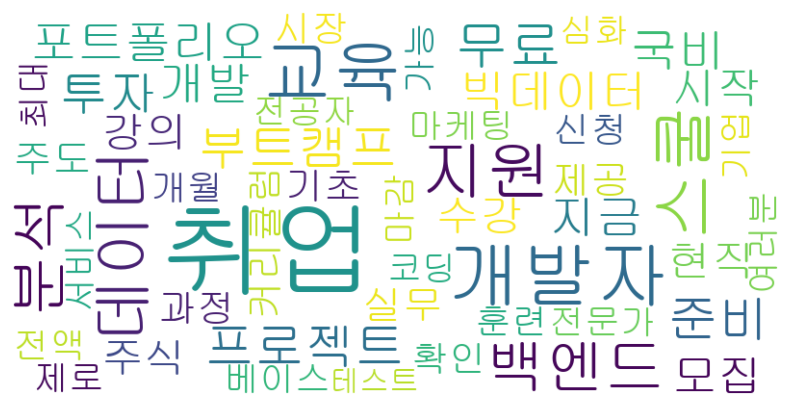

In [90]:
from wordcloud import WordCloud
font_path='C:/Windows/Fonts/NGULIM.ttf'

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path,  # 한글 폰트 경로 설정
).generate_from_frequencies(dict(top_filtered_nouns))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()